# Reprezentacja obrazu i koloru

In [1]:
import cv2
from matplotlib import pyplot as plt

def plot_cv2(image):
    plt.imshow(
        cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    )

plt.rcParams['figure.figsize'] = [16, 8]

Wymiary obrazu:  (897, 1440, 3)


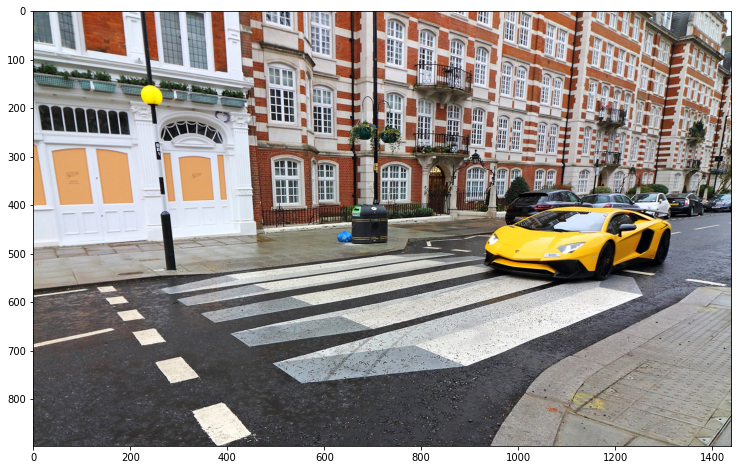

In [2]:
image = cv2.imread("lab2.jpg")
print(f"Wymiary obrazu:  {image.shape}")
plot_cv2(image)

### b) Dokonaj konwersji obrazu do skali szarości. Dlaczego wynikowy obraz nie jest tworzony po prostu przez dodanie składowych R+G+B z wagą 1?

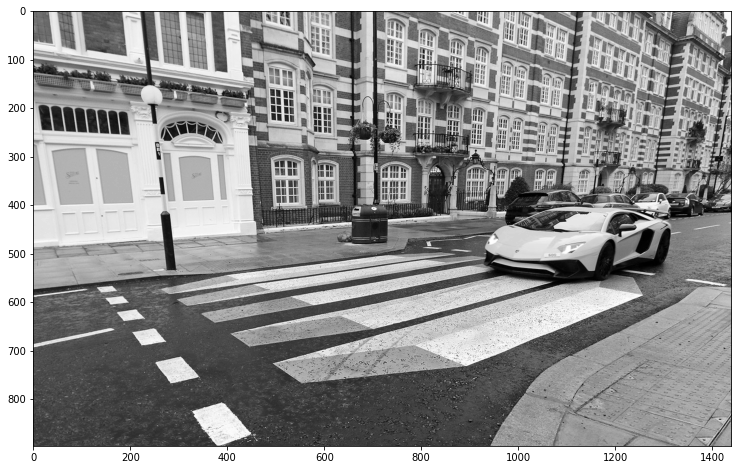

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray');

---

### c) Proszę rozdzielić składowe RGB obrazu i wyświetlić trzy obrazy w skali szarości odpowiadające intensywności pierwotnego obrazu osobno w składowych R, G i B.

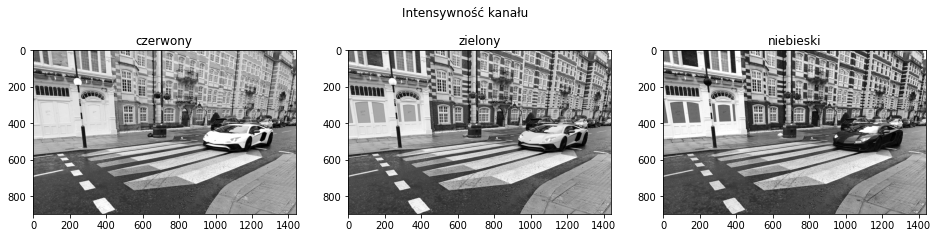

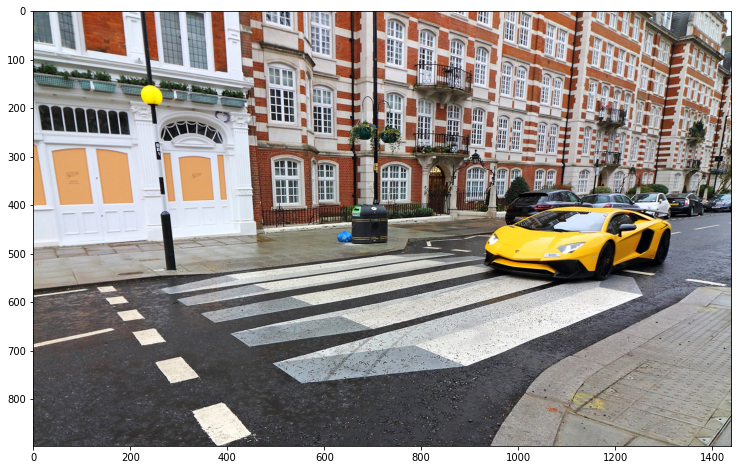

In [4]:
b, g, r = cv2.split(image)

f = plt.figure(1)
f.suptitle("Intensywność kanału", y=0.72)
ax = f.add_subplot(1, 3, 1)
ax.set_title("czerwony")
plt.imshow(r, cmap='gray')
ax = f.add_subplot(1, 3, 2)
ax.set_title("zielony")
plt.imshow(g, cmap='gray')
ax = f.add_subplot(1, 3, 3)
ax.set_title("niebieski")
plt.imshow(b, cmap='gray')

f = plt.figure(2)
plot_cv2(image)

---

### d) Dokonaj konwersji obrazu do skali HSV i wyświetl trzy obrazy w skali szarości odpowiadające intensywności pierwotnego obrazu osobno w składowych H, S i V.

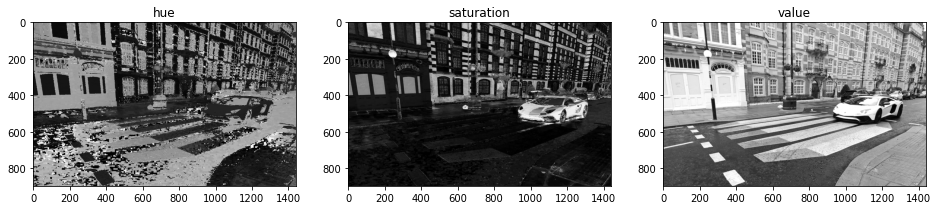

In [5]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(image_hsv)

f = plt.figure()
ax = plt.subplot(1, 3, 1)
ax.set_title("hue")
plt.imshow(h, cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title("saturation")
plt.imshow(s, cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title("value")
plt.imshow(v, cmap='gray')

---

### e) Stwórz obraz na którym widoczny będzie jedynie żółty samochód (*to cenne ćwiczenie w zagadnieniach śledzenia obiektów*). Realizujemy to w skali HSV - dlaczego?

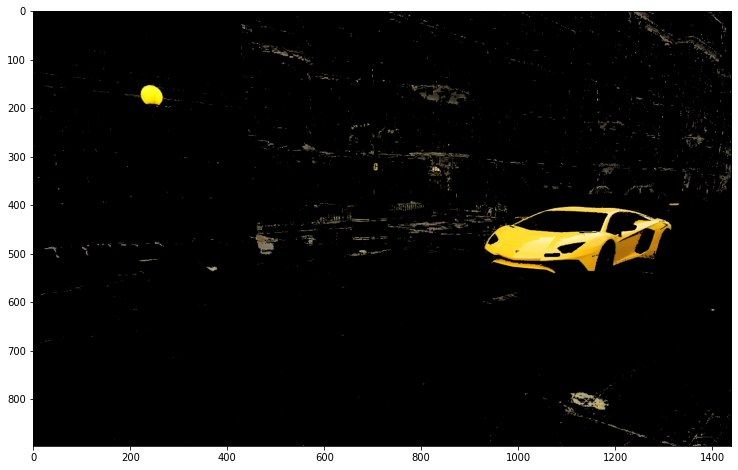

In [6]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(image_hsv, (17, 50, 50), (34, 255,255))
yellow_car = cv2.bitwise_and(image, image, mask=mask)
plot_cv2(yellow_car)

---

### f) Proszę narysować histogram obrazu dla trzech składowych R,G,B

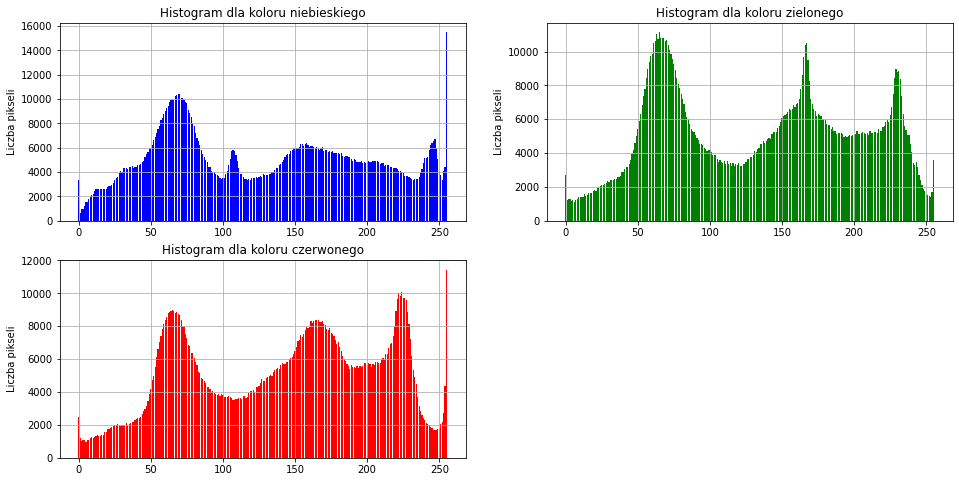

In [7]:
hist_b = cv2.calcHist(
    [image], 
    channels = [0,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)

hist_g = cv2.calcHist(
    [image], 
    channels = [1,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)

hist_r = cv2.calcHist(
    [image], 
    channels = [2,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)

f = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_title("Histogram dla koloru niebieskiego")
ax.set_ylabel("Liczba pikseli")
plt.bar(list(range(0, 256)), height=hist_b.flatten().tolist(), color='b')
plt.grid()

ax = plt.subplot(2, 2, 2)
ax.set_title("Histogram dla koloru zielonego")
ax.set_ylabel("Liczba pikseli")
plt.bar(list(range(0, 256)), height=hist_g.flatten().tolist(), color='g')
plt.grid()

ax = plt.subplot(2, 2, 3)
ax.set_title("Histogram dla koloru czerwonego")
ax.set_ylabel("Liczba pikseli")
plt.bar(list(range(0, 256)), height=hist_r.flatten().tolist(), color='r')
plt.grid()

# ax = plt.subplot(2, 2, 4)
# ax.set_title("Histogram dla koloru czerwonego")
# ax.set_ylabel("Liczba pikseli")
# plt.plot(hist_r, color='r')
# plt.grid()

---

### Proszę zrealizować rozciąganie kontrastu i wyrównanie histogramu – dla obrazu zapisanego w skali szarości. Czym różni się wynik tych dwóch operacji?

In [8]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Rozciaganie kontrastu

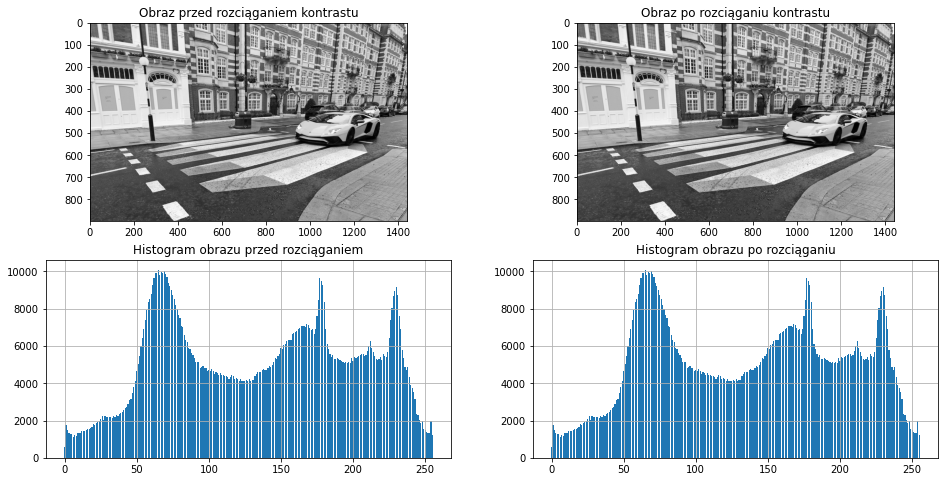

In [9]:
height, width = image_gray.shape[0] , image_gray.shape[1]
contrast_stretching = image_gray.copy()
min_value, max_value = image_gray.min(), image_gray.max()
for h in range(height):
    for w in range(width):
        contrast_stretching[h, w] = (image_gray[h, w] - min_value)/(max_value - min_value)*255

hist = cv2.calcHist(
    [image_gray], 
    channels = [0,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)

hist_cs = cv2.calcHist(
    [contrast_stretching], 
    channels = [0,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)

f = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_title("Obraz przed rozciąganiem kontrastu")
plot_cv2(image_gray)

image_eq = cv2.equalizeHist(image_gray)
ax = plt.subplot(2, 2, 2)
ax.set_title("Obraz po rozciąganiu kontrastu")
plot_cv2(contrast_stretching)

ax = plt.subplot(2, 2, 3)
ax.set_title("Histogram obrazu przed rozciąganiem")
plt.bar(list(range(0, 256)), height=hist.flatten().tolist())
plt.grid()

ax = plt.subplot(2, 2, 4)
ax.set_title("Histogram obrazu po rozciąganiu")
plt.bar(list(range(0, 256)), height=hist_cs.flatten().tolist())
plt.grid()

#### Wyrownanie histogramu

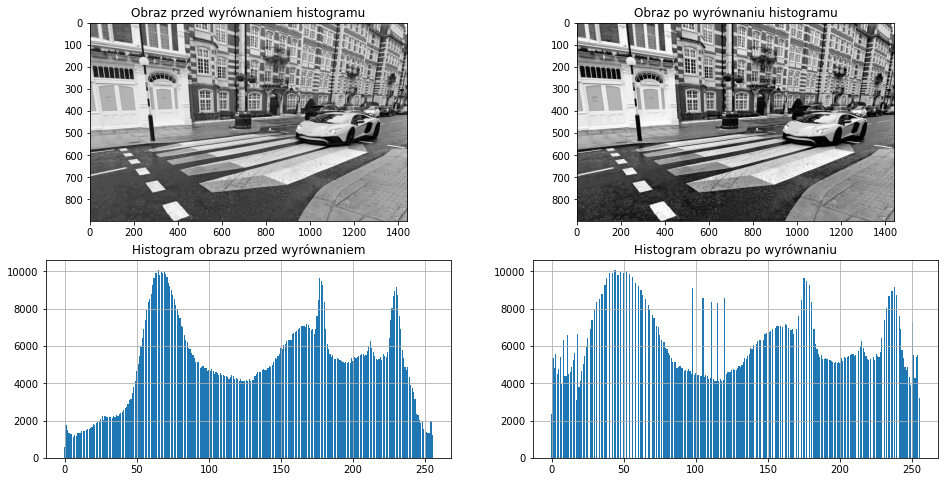

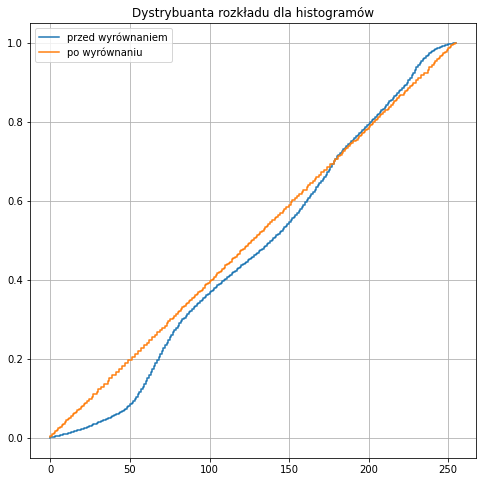

In [27]:
import numpy as np

f = plt.figure()
ax = plt.subplot(2, 2, 1)
ax.set_title("Obraz przed wyrównaniem histogramu")
plot_cv2(image_gray)

image_eq = cv2.equalizeHist(image_gray)
ax = plt.subplot(2, 2, 2)
ax.set_title("Obraz po wyrównaniu histogramu")
plot_cv2(image_eq)

hist = cv2.calcHist(
    [image_gray], 
    channels = [0,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)
hist_eq = cv2.calcHist(
    [image_eq], 
    channels = [0,], 
    mask = None, 
    histSize = [256,], #liczba binow dla kazdego kanalu
    ranges = [0, 256]
)

cumulative = np.cumsum( hist.flatten().tolist() )
cumulative = cumulative/cumulative[-1]
cumulative_eq = np.cumsum( hist_eq.flatten().tolist() )
cumulative_eq = cumulative_eq/cumulative_eq[-1]

ax = plt.subplot(2, 2, 3)
ax.set_title("Histogram obrazu przed wyrównaniem")
plt.bar(list(range(0, 256)), height=hist.flatten().tolist())
plt.grid()

ax = plt.subplot(2, 2, 4)
ax.set_title("Histogram obrazu po wyrównaniu")
plt.bar(list(range(0, 256)), height=hist_eq.flatten().tolist())
plt.grid()

f = plt.figure(2, figsize=(8, 8))
plt.step(np.arange(256), cumulative, label = "przed wyrównaniem")
plt.step(np.arange(256), cumulative_eq, label = "po wyrównaniu")
plt.legend()
plt.title("Dystrybuanta rozkładu dla histogramów")
plt.grid()